<a href="https://colab.research.google.com/github/solobala/CVML10/blob/main/CVML10_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BF%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример понижения размерности с помощью PCA

In [2]:
import numpy as np

In [4]:
train = np.loadtxt('/content/train.csv', delimiter=',', skiprows=1)

In [5]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.reshape(train[:, 1:], (len(train[:, 1:]), 28, 28))

In [7]:
train[:, 1:].shape # было 28234 одномерных гладких вектора размерностью 784

(28234, 784)

In [6]:
train_img.shape # Стало 28234 двумерных 28*28 - это для визуализации

(28234, 28, 28)

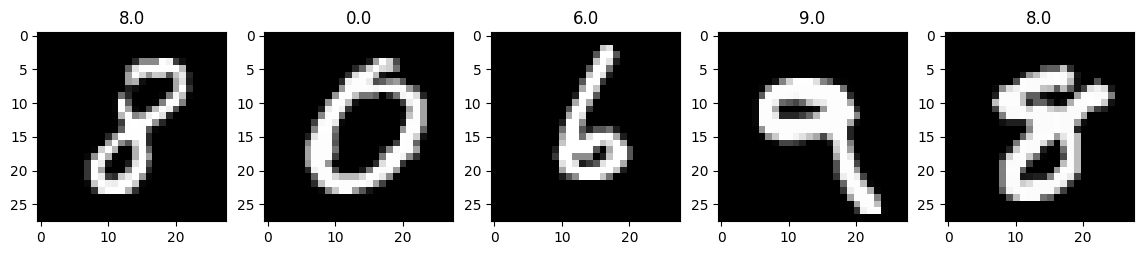

In [8]:
# Визуализация отображать графики и изображения прямо в ноутбуке, а не в отдельном окне.
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [9]:
# выбираем семпл данных для обработки
choices = np.random.choice(train_img.shape[0], 10000) # получаем массив случайных индексов случайного размера

y = train_label[choices] # Метки класса для семпла
X = train_img[choices].reshape(-1, 28 * 28).astype(np.float32) # обратно в одномерный вектор 784

In [10]:
choices

array([ 8353, 12593,  3433, ...,  4545,  3570, 13327])

In [11]:
X[0].shape

(784,)

In [12]:
# центрируем данные - находим среднее значение для каждого x и вычитаем его
X_mean = X.mean(axis=0)
X -= X_mean

In [13]:
# матрица ковариации признаков
cov = np.dot(X.T, X) / X.shape[0]

In [14]:
U, S, _ = np.linalg.svd(cov)
# U - собсвенные вектора матрицы ковариации
# S - собственные значения

## Собственные числа

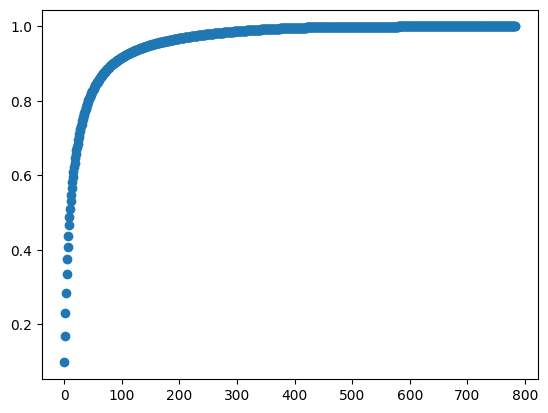

In [15]:
# накопленная сумма собственных значений
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')

In [16]:
for i in range(5):
    print('[%03d] %.3f' % (i, S_cumsum[i]))

[000] 0.097
[001] 0.168
[002] 0.230
[003] 0.284
[004] 0.334


## Понижаем размерность

In [17]:
S_thr = 0.75  # задаем порог для накопленной суммы собственных значений

# определяем необходимое число компонент для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))

print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

n_comp=32 S=0.751


In [18]:
# получаем сжатое представление объектов
Xrot_reduced = np.dot(X, U[:, :n_comp])

## Восстанавливаем изображение после понижения размерности

In [19]:
Xrot_restored = np.dot(Xrot_reduced, U[:,:n_comp].T)

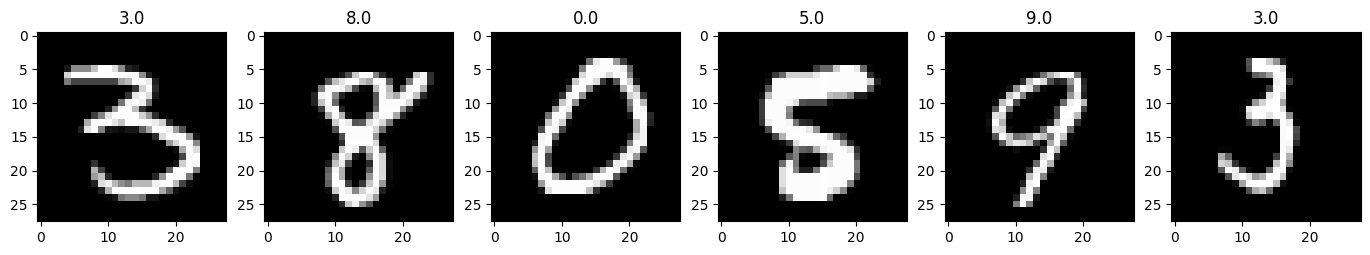

In [20]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(X[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img_ = img + X_mean
    plt.title('%s' % y[i-1])
    plt.imshow(img_.reshape((28,28)), cmap='gray');

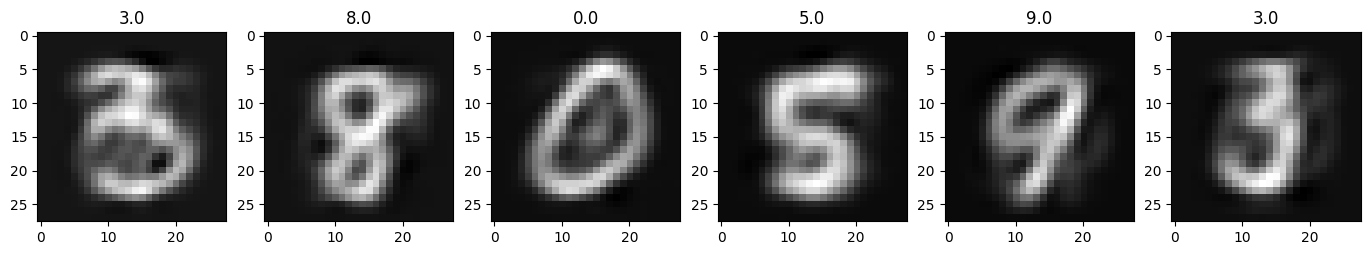

In [21]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(Xrot_restored[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img_ = img + X_mean
    plt.title('%s' % y[i-1])
    plt.imshow(img_.reshape((28,28)) + X_mean.reshape((28,28)), cmap='gray');

## Визуализация собственных векторов

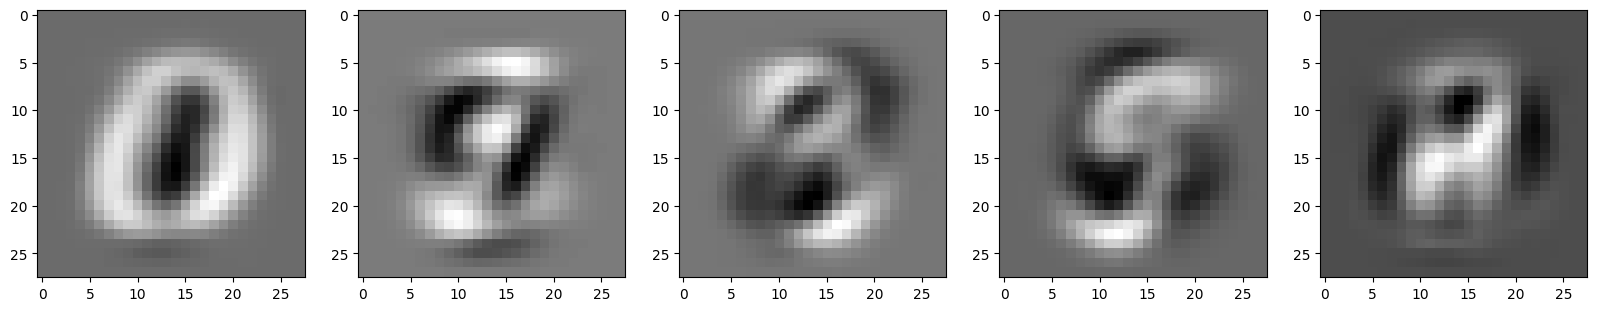

In [22]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(U.T[:5, :], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img.reshape((28,28)), cmap='gray');

Тье эти собственные вектора при умножени и на к-ты и суммировании должны давать любые изображения цифр в пространстве пониженной размерности